In [106]:
#Dependencies
import pandas as pd
import psycopg2
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
from config import database_url
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session

#Resources:
#https://www.youtube.com/watch?v=2uaTPmNvH0I


In [107]:
#Create engine    
engine =create_engine(database_url)
connection = engine.connect()

In [108]:
#Employee dataframe
#Salaries
salaries = pd.read_sql("Select * from salaries",connection)
#salaries_clean = salaries.rename(columns={"Employee Number": "emp_no", "salary":"Salary", "from_date":"From Date","To Date":"To Date"})
salaries_clean.head(5)

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12


In [109]:
#employees
employees = pd.read_sql("Select * from employees",connection)
employees.head(5)

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [110]:
#dept_employees
dept_employees = pd.read_sql("Select * from dept_employees",connection)
dept_employees.head(5)

,emp_no,dept_no,from_date,to_date
0,10001,d005,1986-06-26,9999-01-01
1,10002,d007,1996-08-03,9999-01-01
2,10003,d004,1995-12-03,9999-01-01
3,10004,d004,1986-12-01,9999-01-01
4,10005,d003,1989-09-12,9999-01-01


In [111]:
#titles
titles = pd.read_sql("Select * from titles",connection)
titles_clean = titles.rename(columns={"Emp_no": "emp_no", "title": "Title", "from_date" : "From Date", "to_date" : "To Date"})
titles_clean.head(5)

,emp_no,Title,From Date,To Date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


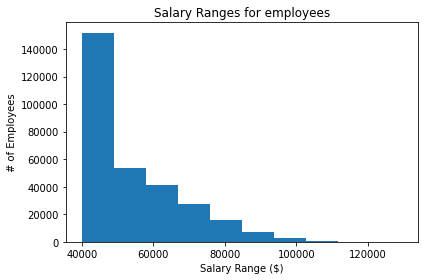

In [117]:
plt.hist(salaries_clean["salary"])
plt.xlabel("Salary Range ($)")
plt.ylabel("# of Employees")
plt.title("Salary Ranges for employees")
plt.grid
plt.tight_layout()

plt.show()

In [115]:
salaries_title = pd.merge(salaries_clean, titles_clean, on="emp_no", how="inner")
salaries_title.head(5)

,emp_no,salary,from_date,to_date,Title,From Date,To Date
0,10001,60117,1986-06-26,1987-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,65828,1996-08-03,1997-08-03,Staff,1996-08-03,9999-01-01
2,10003,40006,1995-12-03,1996-12-02,Senior Engineer,1995-12-03,9999-01-01
3,10004,40054,1986-12-01,1987-12-01,Engineer,1986-12-01,1995-12-01
4,10004,40054,1986-12-01,1987-12-01,Senior Engineer,1995-12-01,9999-01-01
